In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 6.7 MB/s 
     |████████████████████████████████| 113 kB 28.9 MB/s 
     |████████████████████████████████| 167 kB 43.5 MB/s 
     |████████████████████████████████| 1.7 MB 40.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 20.8 MB/s 
     |████████████████████████████████| 2.0 MB 31.3 MB/s 
     |████████████████████████████████| 86 kB 5.3 MB/s 
     |████████████████████████████████| 15.5 MB 20.3 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 1.3 MB 40.2 MB/s 
     |████████████████████████████████| 261 kB 46.4 MB/s 
     |████████████████████████████████| 303 kB 40.9 MB/s 
     |████████████████████████████████| 675 kB 40.7 MB/s 
     |████████████████████████████████| 62 kB 776 kB/s 
     |███████████████████

In [2]:
import pandas as pd
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
headers = [*pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data', nrows=1)]
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data', sep=',' , usecols=[c for c in headers if c != 'motor_UPDRS'])

In [4]:
dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       5875 non-null   int64  
 1   age            5875 non-null   int64  
 2   sex            5875 non-null   int64  
 3   test_time      5875 non-null   float64
 4   total_UPDRS    5875 non-null   float64
 5   Jitter(%)      5875 non-null   float64
 6   Jitter(Abs)    5875 non-null   float64
 7   Jitter:RAP     5875 non-null   float64
 8   Jitter:PPQ5    5875 non-null   float64
 9   Jitter:DDP     5875 non-null   float64
 10  Shimmer        5875 non-null   float64
 11  Shimmer(dB)    5875 non-null   float64
 12  Shimmer:APQ3   5875 non-null   float64
 13  Shimmer:APQ5   5875 non-null   float64
 14  Shimmer:APQ11  5875 non-null   float64
 15  Shimmer:DDA    5875 non-null   float64
 16  NHR            5875 non-null   float64
 17  HNR            5875 non-null   float64
 18  RPDE    

In [5]:
dataset.describe()

subject#          age  ...          DFA          PPE
count  5875.000000  5875.000000  ...  5875.000000  5875.000000
mean     21.494128    64.804936  ...     0.653240     0.219589
std      12.372279     8.821524  ...     0.070902     0.091498
min       1.000000    36.000000  ...     0.514040     0.021983
25%      10.000000    58.000000  ...     0.596180     0.156340
50%      22.000000    65.000000  ...     0.643600     0.205500
75%      33.000000    72.000000  ...     0.711335     0.264490
max      42.000000    85.000000  ...     0.865600     0.731730

[8 rows x 21 columns]

In [12]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5288, 21)
Unseen Data For Predictions: (587, 21)


In [13]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'total_UPDRS', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target       total_UPDRS
2                            Original Data        (5288, 21)
3                           Missing Values             False
4                         Numeric Features                19
5                     Categorical Features                 1
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (3701, 18)
10                    Transformed Test Set        (1587, 18)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              1928
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

# **Comparing All Models**

In [14]:
best = compare_models(exclude = ['ransac'])

Model      MAE       MSE     RMSE      R2  \
et                  Extra Trees Regressor   0.2207    0.1567   0.3939  0.9986   
rf                Random Forest Regressor   0.2766    0.3317   0.5695  0.9971   
lightgbm  Light Gradient Boosting Machine   0.5976    0.9010   0.9368  0.9922   
dt                Decision Tree Regressor   0.2391    1.2507   1.0172  0.9892   
gbr           Gradient Boosting Regressor   2.0680    7.4042   2.7174  0.9357   
knn                 K Neighbors Regressor   4.1232   35.8988   5.9862  0.6881   
ada                    AdaBoost Regressor   5.4525   39.1458   6.2527  0.6598   
lr                      Linear Regression   7.6299   86.8212   9.3162  0.2450   
br                         Bayesian Ridge   7.6520   87.4177   9.3479  0.2399   
ridge                    Ridge Regression   7.6458   87.5963   9.3574  0.2384   
lar                Least Angle Regression   7.6660   87.6687   9.3613  0.2379   
huber                     Huber Regressor   7.6666   91.6870   9.5709  0.2033   
en                            Elastic Net   7.9658   95.0863   9.7495  0.1733   
lasso                    Lasso Regression   7.9957   95.7403   9.7829  0.1676   
omp           Orthogonal Matching Pursuit   8.5052  104.8492  10.2374  0.0886   
llar         Lasso Least Angle Regression   8.6974  115.5524  10.7473 -0.0043   
dummy                     Dummy Regressor   8.6974  115.5524  10.7473 -0.0043   
par          Passive Aggressive Regressor  12.3142  227.0600  14.9760 -0.9829   

           RMSLE    MAPE  TT (Sec)  
et        0.0180  0.0093     0.991  
rf        0.0239  0.0111     2.496  
lightgbm  0.0404  0.0253     0.253  
dt        0.0363  0.0092     0.054  
gbr       0.1222  0.0916     1.055  
knn       0.2272  0.1713     0.066  
ada       0.2515  0.2382     0.497  
lr        0.3490  0.3327     0.332  
br        0.3499  0.3336     0.021  
ridge     0.3505  0.3339     0.016  
lar       0.3521  0.3335     0.022  
huber     0.3525  0.3257     0.108  
en        0.3684  0.3528     0.021  
lasso     0.3698  0.3546     0.017  
omp       0.3859  0.3804     0.016  
llar      0.4068  0.4006     0.017  
dummy     0.4068  0.4006     0.015  
par       0.5255  0.5271     0.020

# **Create Some Model**
*italicized text*

In [15]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True
dummy                       Dummy Regressor  ...   True

[24 rows x 3 columns]

## **Extra Trees Regressor**

In [16]:
et = create_model('et')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2080  0.1317  0.3629  0.9988  0.0171  0.0091
1     0.2304  0.1660  0.4074  0.9985  0.0195  0.0099
2     0.1942  0.1259  0.3548  0.9989  0.0144  0.0080
3     0.2146  0.1412  0.3758  0.9988  0.0176  0.0091
4     0.2299  0.1613  0.4017  0.9987  0.0166  0.0092
5     0.1962  0.1218  0.3490  0.9989  0.0200  0.0085
6     0.2317  0.1721  0.4148  0.9985  0.0191  0.0100
7     0.2592  0.2321  0.4817  0.9980  0.0164  0.0097
8     0.2333  0.1809  0.4253  0.9985  0.0213  0.0100
9     0.2090  0.1338  0.3657  0.9988  0.0178  0.0093
Mean  0.2207  0.1567  0.3939  0.9986  0.0180  0.0093
SD    0.0189  0.0319  0.0387  0.0003  0.0019  0.0006

In [17]:
print(et)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=123, verbose=0, warm_start=False)


## **Decision Tree Regressor**

In [18]:
dt = create_model('dt')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2203  1.3212  1.1494  0.9884  0.0461  0.0079
1     0.2289  0.8328  0.9126  0.9924  0.0303  0.0087
2     0.3483  2.1870  1.4789  0.9809  0.0584  0.0156
3     0.3151  1.7606  1.3269  0.9849  0.0385  0.0106
4     0.2448  1.1926  1.0920  0.9904  0.0543  0.0112
5     0.3612  3.2976  1.8159  0.9711  0.0551  0.0139
6     0.1259  0.1444  0.3800  0.9987  0.0137  0.0048
7     0.1341  0.1327  0.3642  0.9988  0.0120  0.0048
8     0.2615  1.4305  1.1961  0.9881  0.0371  0.0090
9     0.1511  0.2076  0.4557  0.9981  0.0172  0.0060
Mean  0.2391  1.2507  1.0172  0.9892  0.0363  0.0092
SD    0.0807  0.9541  0.4648  0.0083  0.0166  0.0035

In [19]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## **Random Forest Regressor**

In [20]:
rf = create_model('rf')

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.2581  0.3183  0.5642  0.9972  0.0221  0.0103
1     0.3037  0.3936  0.6274  0.9964  0.0286  0.0128
2     0.2767  0.4056  0.6368  0.9964  0.0271  0.0110
3     0.3093  0.4915  0.7011  0.9958  0.0265  0.0122
4     0.2953  0.3732  0.6109  0.9970  0.0294  0.0119
5     0.2910  0.3475  0.5895  0.9970  0.0225  0.0114
6     0.2419  0.2034  0.4510  0.9982  0.0166  0.0095
7     0.2712  0.2377  0.4876  0.9979  0.0165  0.0098
8     0.2826  0.3736  0.6113  0.9969  0.0314  0.0127
9     0.2360  0.1726  0.4154  0.9984  0.0179  0.0099
Mean  0.2766  0.3317  0.5695  0.9971  0.0239  0.0111
SD    0.0237  0.0945  0.0858  0.0008  0.0052  0.0012

In [21]:
print(rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# **Tune a Model**

## **tuned et**

In [22]:
tuned_et = tune_model(et)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.8748  5.5227  2.3500  0.9514  0.1136  0.0866
1     1.7916  5.2078  2.2821  0.9524  0.1042  0.0795
2     1.8141  5.1322  2.2654  0.9551  0.1111  0.0860
3     1.7727  5.2615  2.2938  0.9548  0.1138  0.0840
4     1.7441  5.0253  2.2417  0.9596  0.0939  0.0714
5     1.7949  5.1091  2.2603  0.9552  0.1002  0.0772
6     1.8887  5.6997  2.3874  0.9502  0.1094  0.0864
7     1.9076  5.8968  2.4283  0.9484  0.1011  0.0788
8     1.9096  6.2616  2.5023  0.9478  0.1044  0.0794
9     1.5848  4.1116  2.0277  0.9625  0.0972  0.0713
Mean  1.8083  5.3228  2.3039  0.9537  0.1049  0.0801
SD    0.0932  0.5520  0.1217  0.0045  0.0066  0.0054

In [23]:
print(tuned_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


## **Tuned dt**

In [24]:
tuned_dt = tune_model(dt)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     0.7505  2.7764  1.6663  0.9755  0.0561  0.0264
1     0.7936  2.3957  1.5478  0.9781  0.0608  0.0310
2     0.7175  2.9083  1.7054  0.9745  0.0647  0.0283
3     0.7500  2.4332  1.5599  0.9791  0.0477  0.0258
4     0.6807  1.8588  1.3634  0.9851  0.0633  0.0267
5     0.8024  4.1692  2.0419  0.9635  0.0608  0.0285
6     0.3524  0.2901  0.5386  0.9975  0.0284  0.0163
7     0.3712  0.4337  0.6586  0.9962  0.0281  0.0155
8     0.5256  1.6884  1.2994  0.9859  0.0482  0.0211
9     0.3651  0.3886  0.6233  0.9965  0.0301  0.0164
Mean  0.6109  1.9342  1.3004  0.9832  0.0488  0.0236
SD    0.1781  1.2052  0.4930  0.0106  0.0141  0.0055

In [25]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## **Tuned rf**

In [26]:
tuned_rf = tune_model(rf)

MAE     MSE    RMSE      R2   RMSLE    MAPE
0     1.3402  3.2030  1.7897  0.9718  0.0727  0.0543
1     1.3259  3.1836  1.7843  0.9709  0.0795  0.0559
2     1.2825  3.0368  1.7426  0.9734  0.0753  0.0532
3     1.3000  3.0831  1.7559  0.9735  0.0727  0.0533
4     1.3170  3.1722  1.7811  0.9745  0.0759  0.0528
5     1.2707  2.6830  1.6380  0.9765  0.0657  0.0501
6     1.2821  2.8490  1.6879  0.9751  0.0730  0.0538
7     1.3294  3.1040  1.7618  0.9728  0.0701  0.0527
8     1.2938  3.1959  1.7877  0.9733  0.0751  0.0519
9     1.1859  2.5094  1.5841  0.9771  0.0714  0.0500
Mean  1.2927  3.0020  1.7313  0.9739  0.0732  0.0528
SD    0.0418  0.2293  0.0677  0.0018  0.0035  0.0017

In [27]:
print(tuned_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


# **Plot some Model**

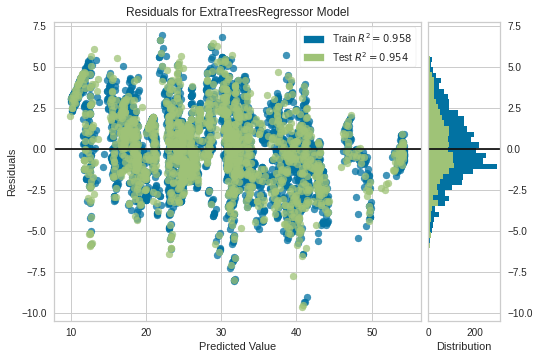

In [31]:
plot_model(tuned_et)

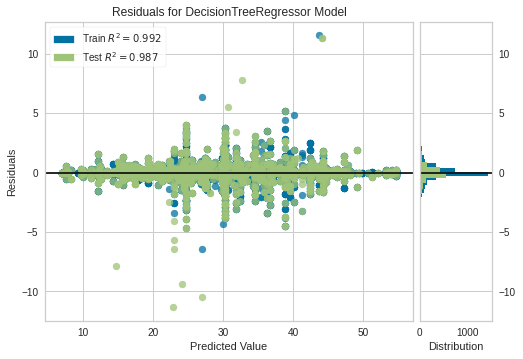

In [29]:
plot_model(tuned_dt)

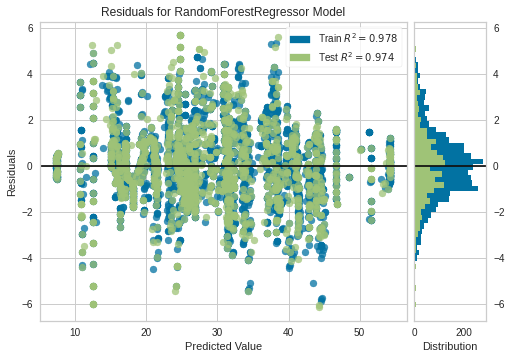

In [30]:
plot_model(tuned_rf)

# **Prediction error plot**

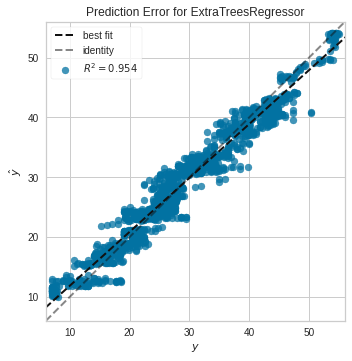

In [32]:
plot_model(tuned_et, plot = 'error')

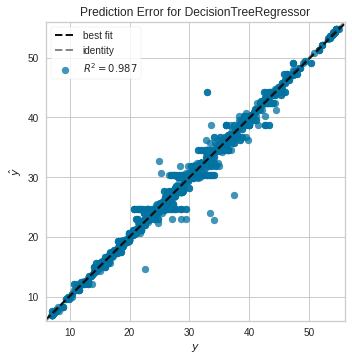

In [33]:
plot_model(tuned_dt, plot = 'error')

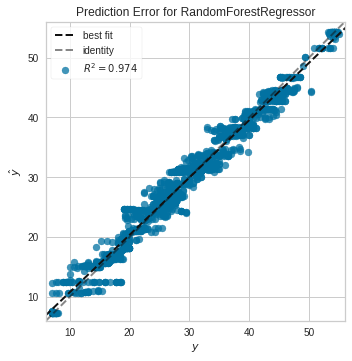

In [34]:
plot_model(tuned_rf, plot = 'error')

# **Feature Importance Plot**

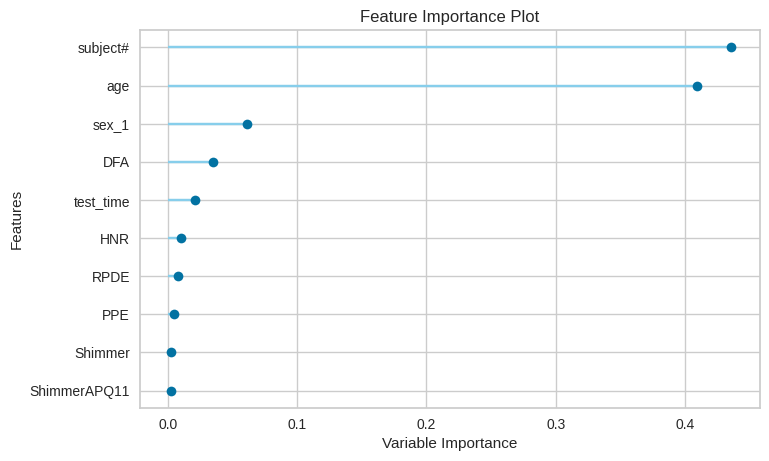

In [35]:
plot_model(tuned_et, plot = 'feature')

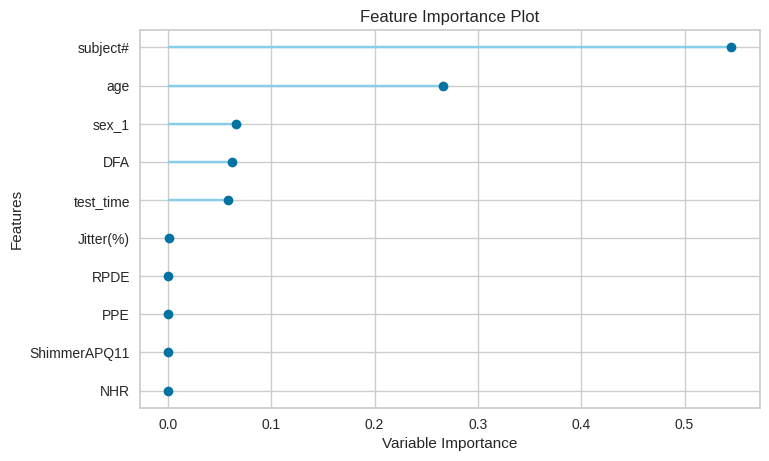

In [37]:
plot_model(tuned_dt, plot = 'feature')

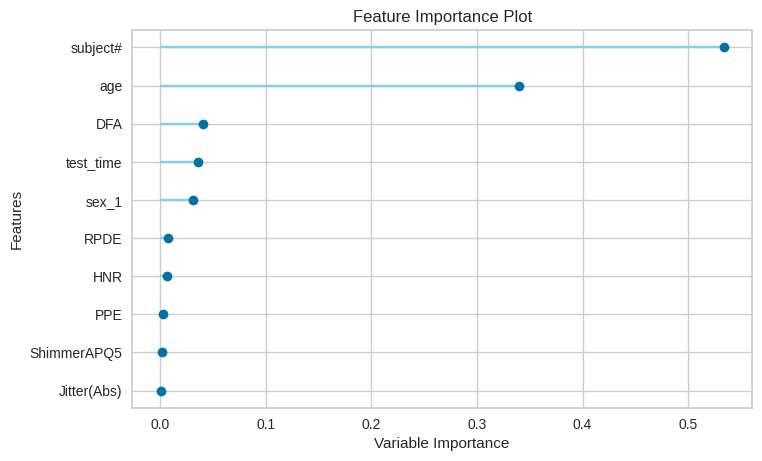

In [38]:
plot_model(tuned_rf, plot = 'feature')

In [39]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [40]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [41]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Predict on Test / Hold-out Sample**

In [42]:
predict_model(tuned_et)

Model     MAE     MSE    RMSE      R2  RMSLE    MAPE
0  Extra Trees Regressor  1.7648  5.1128  2.2611  0.9538  0.105  0.0788

subject#   age   test_time  ...  sex_1  total_UPDRS      Label
0         33.0  66.0   72.412003  ...    1.0    30.148001  30.995631
1         19.0  55.0  117.779999  ...    0.0    26.663000  24.200988
2         16.0  65.0  159.429993  ...    0.0    22.643999  18.539328
3         10.0  58.0   59.354000  ...    0.0    19.000000  20.333867
4         42.0  61.0  149.839996  ...    0.0    32.987999  33.599989
...        ...   ...         ...  ...    ...          ...        ...
1582      19.0  55.0  183.820007  ...    0.0    26.103001  25.191133
1583      35.0  71.0   48.886002  ...    0.0    54.556000  53.798221
1584       6.0  63.0  131.339996  ...    0.0    42.688999  39.682902
1585       5.0  75.0   98.410004  ...    0.0    42.231998  41.242058
1586      40.0  85.0  138.470001  ...    1.0    24.870001  26.015782

[1587 rows x 20 columns]

In [43]:
predict_model(tuned_dt)

Model     MAE    MSE    RMSE      R2   RMSLE    MAPE
0  Decision Tree Regressor  0.6356  1.433  1.1971  0.9871  0.0406  0.0229

subject#   age   test_time  ...  sex_1  total_UPDRS      Label
0         33.0  66.0   72.412003  ...    1.0    30.148001  30.307509
1         19.0  55.0  117.779999  ...    0.0    26.663000  26.629667
2         16.0  65.0  159.429993  ...    0.0    22.643999  22.477825
3         10.0  58.0   59.354000  ...    0.0    19.000000  19.000000
4         42.0  61.0  149.839996  ...    0.0    32.987999  34.607278
...        ...   ...         ...  ...    ...          ...        ...
1582      19.0  55.0  183.820007  ...    0.0    26.103001  26.035667
1583      35.0  71.0   48.886002  ...    0.0    54.556000  54.713929
1584       6.0  63.0  131.339996  ...    0.0    42.688999  43.267899
1585       5.0  75.0   98.410004  ...    0.0    42.231998  42.358000
1586      40.0  85.0  138.470001  ...    1.0    24.870001  24.736875

[1587 rows x 20 columns]

In [44]:
predict_model(tuned_rf)

Model   MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  1.28  2.9229  1.7096  0.9736  0.0764  0.0537

subject#   age   test_time  ...  sex_1  total_UPDRS      Label
0         33.0  66.0   72.412003  ...    1.0    30.148001  31.113975
1         19.0  55.0  117.779999  ...    0.0    26.663000  25.053480
2         16.0  65.0  159.429993  ...    0.0    22.643999  21.405024
3         10.0  58.0   59.354000  ...    0.0    19.000000  19.312185
4         42.0  61.0  149.839996  ...    0.0    32.987999  34.023352
...        ...   ...         ...  ...    ...          ...        ...
1582      19.0  55.0  183.820007  ...    0.0    26.103001  25.841493
1583      35.0  71.0   48.886002  ...    0.0    54.556000  54.297225
1584       6.0  63.0  131.339996  ...    0.0    42.688999  42.765384
1585       5.0  75.0   98.410004  ...    0.0    42.231998  41.231792
1586      40.0  85.0  138.470001  ...    1.0    24.870001  26.109582

[1587 rows x 20 columns]

# **Finalize Models for Deployment**

In [45]:
final_et = finalize_model(tuned_et)

In [46]:
print(final_et)

ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=9,
                    max_features=1.0, max_leaf_nodes=None, max_samples=None,
                    min_impurity_decrease=0.1, min_impurity_split=None,
                    min_samples_leaf=4, min_samples_split=7,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=123, verbose=0,
                    warm_start=False)


In [50]:
predict_model(final_et)

Model     MAE     MSE    RMSE      R2   RMSLE    MAPE
0  Extra Trees Regressor  1.7088  4.8128  2.1938  0.9566  0.1027  0.0767

subject#   age   test_time  ...  sex_1  total_UPDRS      Label
0         33.0  66.0   72.412003  ...    1.0    30.148001  30.811039
1         19.0  55.0  117.779999  ...    0.0    26.663000  24.505956
2         16.0  65.0  159.429993  ...    0.0    22.643999  18.544630
3         10.0  58.0   59.354000  ...    0.0    19.000000  19.803052
4         42.0  61.0  149.839996  ...    0.0    32.987999  33.511716
...        ...   ...         ...  ...    ...          ...        ...
1582      19.0  55.0  183.820007  ...    0.0    26.103001  25.235235
1583      35.0  71.0   48.886002  ...    0.0    54.556000  53.658358
1584       6.0  63.0  131.339996  ...    0.0    42.688999  40.301726
1585       5.0  75.0   98.410004  ...    0.0    42.231998  41.496325
1586      40.0  85.0  138.470001  ...    1.0    24.870001  26.034160

[1587 rows x 20 columns]

In [47]:
final_dt = finalize_model(tuned_dt)

In [48]:
print(final_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=10,
                      max_features=1.0, max_leaf_nodes=None,
                      min_impurity_decrease=0.01, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=9,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


In [51]:
predict_model(final_dt)

Model     MAE     MSE    RMSE      R2   RMSLE   MAPE
0  Decision Tree Regressor  0.5077  0.8785  0.9373  0.9921  0.0318  0.018

subject#   age   test_time  ...  sex_1  total_UPDRS      Label
0         33.0  66.0   72.412003  ...    1.0    30.148001  30.223986
1         19.0  55.0  117.779999  ...    0.0    26.663000  26.630273
2         16.0  65.0  159.429993  ...    0.0    22.643999  21.877823
3         10.0  58.0   59.354000  ...    0.0    19.000000  19.000000
4         42.0  61.0  149.839996  ...    0.0    32.987999  34.457112
...        ...   ...         ...  ...    ...          ...        ...
1582      19.0  55.0  183.820007  ...    0.0    26.103001  26.103001
1583      35.0  71.0   48.886002  ...    0.0    54.556000  54.698385
1584       6.0  63.0  131.339996  ...    0.0    42.688999  42.688999
1585       5.0  75.0   98.410004  ...    0.0    42.231998  42.231998
1586      40.0  85.0  138.470001  ...    1.0    24.870001  24.870001

[1587 rows x 20 columns]

In [49]:
final_rf = finalize_model(tuned_rf)

In [52]:
print(final_rf)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.1,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=7, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)


In [53]:
predict_model(final_rf)

Model     MAE     MSE   RMSE      R2   RMSLE    MAPE
0  Random Forest Regressor  1.2316  2.6406  1.625  0.9762  0.0691  0.0507

subject#   age   test_time  ...  sex_1  total_UPDRS      Label
0         33.0  66.0   72.412003  ...    1.0    30.148001  31.097696
1         19.0  55.0  117.779999  ...    0.0    26.663000  25.987928
2         16.0  65.0  159.429993  ...    0.0    22.643999  21.235319
3         10.0  58.0   59.354000  ...    0.0    19.000000  19.226492
4         42.0  61.0  149.839996  ...    0.0    32.987999  33.476561
...        ...   ...         ...  ...    ...          ...        ...
1582      19.0  55.0  183.820007  ...    0.0    26.103001  25.987928
1583      35.0  71.0   48.886002  ...    0.0    54.556000  54.247482
1584       6.0  63.0  131.339996  ...    0.0    42.688999  43.418437
1585       5.0  75.0   98.410004  ...    0.0    42.231998  41.043879
1586      40.0  85.0  138.470001  ...    1.0    24.870001  26.162528

[1587 rows x 20 columns]

# **Predict on Unseen Data**

In [54]:
unseen_predictions = predict_model(final_et, data=data_unseen)
unseen_predictions.head()

subject#  age  sex  test_time  ...     RPDE      DFA      PPE      Label
0         1   72    0     40.652  ...  0.53949  0.57243  0.19500  38.375455
1         1   72    0     54.640  ...  0.47712  0.54234  0.23844  38.781815
2         1   72    0     82.653  ...  0.46686  0.57984  0.19390  39.691056
3         1   72    0     96.633  ...  0.61348  0.60661  0.15881  39.753589
4         1   72    0    131.640  ...  0.52714  0.59220  0.18211  41.858423

[5 rows x 22 columns]

In [56]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.total_UPDRS, unseen_predictions.Label, 'R2')

0.955

In [58]:
unseen_predictions2 = predict_model(final_dt, data=data_unseen)
unseen_predictions2.head()
check_metric(unseen_predictions2.total_UPDRS, unseen_predictions2.Label, 'R2')

0.9926

In [59]:
unseen_predictions3 = predict_model(final_rf, data=data_unseen)
unseen_predictions3.head()
check_metric(unseen_predictions3.total_UPDRS, unseen_predictions3.Label, 'R2')

0.978

# **Saving Models**

In [61]:
save_model(final_et,'Final ET Model 10Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                      criterion='mse', max_depth=9,
                                      max_features=1.0, max_leaf_nodes=None,
                                      max_samples=None,
                                      min_i

In [62]:
save_model(final_dt,'Final DT Model 10Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse',
                                        max_depth=10, max_features=1.0,
                                        max_leaf_nodes=None,

In [63]:
save_model(final_rf,'Final RF Model 10Dec2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='total_UPDRS', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                        criterion='mse', max_depth=9,
                                        max_features=1.0, max_leaf_nodes=None,
                                        max_samples=None,
                                   

# **Loading the Saved Model**

In [64]:
saved_final_et = load_model('Final ET Model 10Dec2021')

Transformation Pipeline and Model Successfully Loaded


In [65]:
new_prediction = predict_model(saved_final_et, data=data_unseen)

In [66]:
new_prediction.head()

subject#  age  sex  test_time  ...     RPDE      DFA      PPE      Label
0         1   72    0     40.652  ...  0.53949  0.57243  0.19500  38.375455
1         1   72    0     54.640  ...  0.47712  0.54234  0.23844  38.781815
2         1   72    0     82.653  ...  0.46686  0.57984  0.19390  39.691056
3         1   72    0     96.633  ...  0.61348  0.60661  0.15881  39.753589
4         1   72    0    131.640  ...  0.52714  0.59220  0.18211  41.858423

[5 rows x 22 columns]

In [67]:
from pycaret.utils import check_metric
check_metric(new_prediction.total_UPDRS, new_prediction.Label, 'R2')

0.955